In [1]:
%matplotlib inline
import carmcmc as cm
import numpy as np
import matplotlib.pyplot as plt


sigmay = 2.3 
p = 5 
mu = 17.0  
qpo_width = np.array([1.0/100.0, 1.0/300.0, 1.0/200.0]) 
qpo_cent = np.array([1.0/5.0, 1.0/25.0]) 
ar_roots = cm.get_ar_roots(qpo_width, qpo_cent) 
ar_coefs = np.poly(ar_roots)
ma_coefs = np.array([1.0, 4.5, 1.25, 0.0, 0.0])
sigsqr = sigmay ** 2 / cm.carma_variance(1.0, ar_roots, ma_coefs=ma_coefs)

Text(0.5,1,'LC_55571_Z')

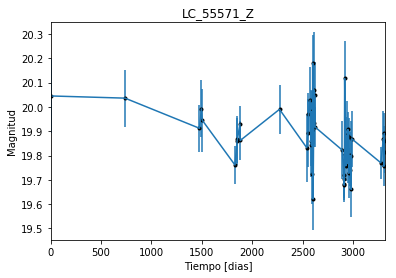

In [2]:
data = np.genfromtxt('LC_55571_Z.dat')
juldate = data[:,0]  
t = juldate - juldate.min()  
y = data[:,1]  
yerr = data[:,2]  

plt.errorbar(t, y, yerr=yerr)
plt.plot(t, y, 'k.')
plt.xlim(t.min(), t.max())
plt.xlabel('Tiempo [dias]')
plt.ylabel('Magnitud')
plt.title('LC_55571_Z')

In [3]:
model = cm.CarmaModel(t, y, yerr, p=4, q=1)

In [4]:
%%capture capt
sample = model.run_mcmc(20000)

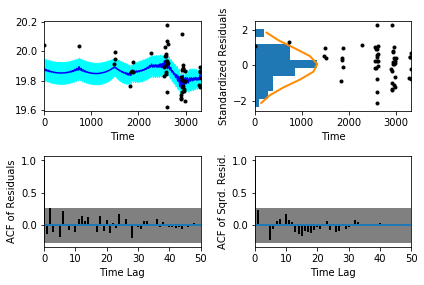

In [5]:
sample.assess_fit()

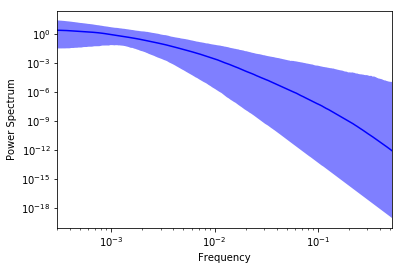

In [6]:
psd_low, psd_hi, psd_mid, frequencies = sample.plot_power_spectrum(percentile=95.0, nsamples=5000)

In [8]:
dt = t[1:] - t[:-1]
noise_level = 2.0 * np.mean(dt) * np.mean(yerr ** 2)

Text(0.5,1,'LC_55571_Z')

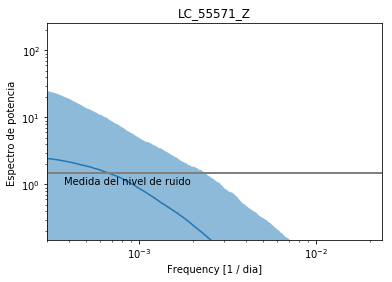

In [11]:
plt.loglog(frequencies, psd_mid)
plt.fill_between(frequencies, psd_hi, y2=psd_low, alpha=0.5)
plt.loglog(frequencies, np.ones(frequencies.size) * noise_level, color='grey', lw=2)
plt.ylim(noise_level / 10.0, plt.ylim()[1])
plt.xlim(frequencies.min(), frequencies[psd_hi > noise_level].max() * 10.0)
plt.ylabel('Espectro de potencia ')
plt.xlabel('Frequency [1 / dia]')
plt.annotate("Medida del nivel de ruido", (1.25 * plt.xlim()[0], noise_level / 1.5))
plt.title('LC_55571_Z')

Text(0.5,1,'Prediccion , valor esperado LC_55571_Z')

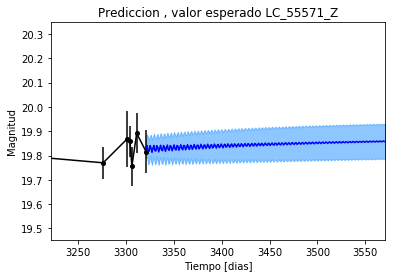

In [12]:
tpredict = t.max() + np.linspace(0.0, 250.0, 250)
ypredict, yp_var = sample.predict(tpredict)
plt.errorbar(t, y, yerr=yerr, color='black')
plt.plot(t, y, 'ko', ms=4)
plt.fill_between(tpredict, ypredict+np.sqrt(yp_var), y2=ypredict-np.sqrt(yp_var), color='DodgerBlue', alpha=0.5)
plt.plot(tpredict, ypredict, 'b-')
plt.xlim(tpredict.min() - 100, tpredict.max())
plt.xlabel('Tiempo [dias]')
plt.ylabel('Magnitud')
plt.title('Prediccion , valor esperado LC_55571_Z')

Text(0.5,1,'Prediccion, Caminos simulados LC_55571_Z')

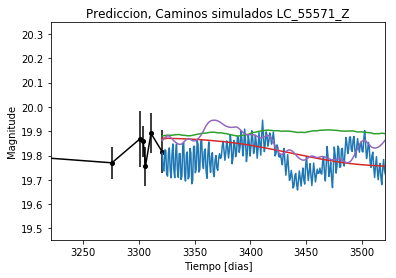

In [18]:
tpredict = t.max() + np.linspace(0.0, 200.0, 250)
npaths = 5
plt.errorbar(t, y, yerr=yerr, color='black')
plt.plot(t, y, 'ko', ms=4)
for i in range(npaths):
    ysim = sample.simulate(tpredict, bestfit='random')  
    plt.plot(tpredict, ysim)
plt.xlabel('Tiempo [dias]')
plt.ylabel('Magnitude')
plt.xlim(tpredict.min()-100, tpredict.max())
plt.title('Prediccion, Caminos simulados LC_55571_Z')

/usr/local/lib/python2.7/dist-packages/matplotlib/axes/_axes.py:6571: UserWarning: The 'normed' kwarg is deprecated, and has been replaced by the 'density' kwarg.
  warnings.warn("The 'normed' kwarg is deprecated, and has been "


Text(0.5,1,'LC_55571_Z')

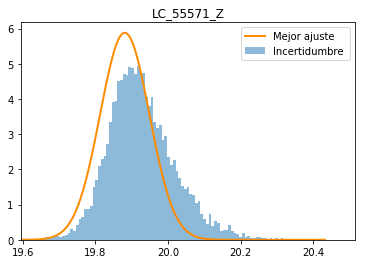

In [19]:
tpredict = 10.0
nsim = 10000
ysim = np.zeros(nsim)
for i in range(nsim):
    ysim[i] = sample.simulate(tpredict, bestfit='random')
yhat, yhvar = sample.predict(tpredict)
plt.hist(ysim, bins=100, alpha=0.5, histtype='stepfilled', normed=True, label='Incertidumbre ')
ymin, ymax = plt.xlim()
ygrid = np.linspace(ymin, ymax, 200)
predictive_pdf = 1.0 / np.sqrt(2.0 * np.pi * yhvar) * np.exp(-0.5 * (ygrid - yhat) ** 2 / yhvar)
plt.plot(ygrid, predictive_pdf, color='DarkOrange', lw=2, label='Mejor ajuste ')
plt.xlim(ymin, ymax + 0.1 * (ymax - ymin))
plt.legend(loc='upper right')
plt.title('LC_55571_Z')

Text(0.5,1,'Interpolacion, camino simulado LC_55571_Z')

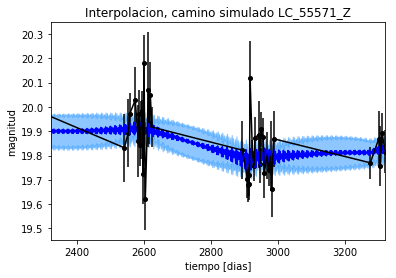

In [20]:
tinterp = t.max() - 1000 + np.linspace(0.0, 1000.0, 500)
ypredict, yp_var = sample.predict(tinterp)
plt.errorbar(t, y, yerr=yerr, color='black')
plt.plot(t, y, 'ko', ms=4)
plt.fill_between(tinterp, ypredict+np.sqrt(yp_var), y2=ypredict-np.sqrt(yp_var), color='DodgerBlue', alpha=0.5)
plt.plot(tinterp, ypredict, 'b-')
plt.xlabel('tiempo [dias]')
plt.ylabel('magnitud')
plt.xlim(tinterp.min(), tinterp.max())
plt.title('Interpolacion, camino simulado LC_55571_Z')

Text(0.5,1,'Interpolacion, camino simulado LC_55571_Z')

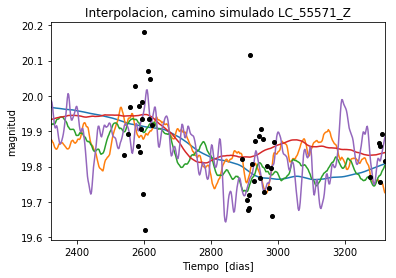

In [21]:
npaths = 5
for i in range(npaths):
    ysim = sample.simulate(tinterp, bestfit='random')
    plt.plot(tinterp, ysim)
plt.plot(t, y, 'ko', ms=4)
plt.xlabel('Tiempo  [dias]')
plt.ylabel('magnitud')
plt.xlim(tinterp.min(), tinterp.max())
plt.title('Interpolacion, camino simulado LC_55571_Z')

In [22]:
sample.parameters

['quad_coefs',
 'logpost',
 'ar_coefs',
 'mu',
 'psd_centroid',
 'loglik',
 'psd_width',
 'var',
 'measerr_scale',
 'sigma',
 'ma_coefs',
 'ar_roots']

In [23]:
sample.posterior_summaries('psd_width')

Calculating effective number of samples
Posterior summary for parameter psd_width  element 0
----------------------------------------------
Effective number of independent samples: 787.495962028
Median: 0.00802671942177
Standard deviation: 0.188194777899
68% credibility interval: [ 0.00084957  0.13607361]
95% credibility interval: [  3.55837384e-04   7.63461071e-01]
99% credibility interval: [  3.11581728e-04   9.69741045e-01]
Posterior summary for parameter psd_width  element 1
----------------------------------------------
Effective number of independent samples: 547.520490024
Median: 0.0023634379571
Standard deviation: 0.0786661659319
68% credibility interval: [ 0.0005223  0.0257799]
95% credibility interval: [ 0.00033245  0.23720277]
99% credibility interval: [  3.07301606e-04   5.59012120e-01]
Posterior summary for parameter psd_width  element 2
----------------------------------------------
Effective number of independent samples: 1027.10353803
Median: 0.0208518495718
Standard de

In [24]:
sample.posterior_summaries('logpost')

Calculating effective number of samples
Posterior summary for parameter logpost  element 0
----------------------------------------------
Effective number of independent samples: 1392.58471552
Median: 66.4995663665
Standard deviation: 1.56303580282
68% credibility interval: [ 64.74535743  67.55175122]
95% credibility interval: [ 62.06276523  67.9648581 ]
99% credibility interval: [ 59.89749294  68.12628472]


In [25]:
sample.posterior_summaries('ar_coefs')

Calculating effective number of samples
Posterior summary for parameter ar_coefs  element 0
----------------------------------------------
Effective number of independent samples: nan
Median: 1.0
Standard deviation: 0.0
68% credibility interval: [ 1.  1.]
95% credibility interval: [ 1.  1.]
99% credibility interval: [ 1.  1.]
Posterior summary for parameter ar_coefs  element 1
----------------------------------------------
Effective number of independent samples: 592.714361551
Median: 0.558485214283
Standard deviation: 2.08564455738
68% credibility interval: [ 0.05240854  3.48194657]
95% credibility interval: [ 0.01393953  7.20169582]
99% credibility interval: [  9.33957557e-03   1.02333402e+01]
Posterior summary for parameter ar_coefs  element 2
----------------------------------------------
Effective number of independent samples: 466.983329356
Median: 0.378211963585
Standard deviation: 8.71726817639
68% credibility interval: [ 0.01438921  7.28154431]
95% credibility interval: [  8.0

In [26]:
sample.posterior_summaries('ma_coefs')

Calculating effective number of samples
Posterior summary for parameter ma_coefs  element 0
----------------------------------------------
Effective number of independent samples: nan
Median: 1.0
Standard deviation: 0.0
68% credibility interval: [ 1.  1.]
95% credibility interval: [ 1.  1.]
99% credibility interval: [ 1.  1.]
Posterior summary for parameter ma_coefs  element 1
----------------------------------------------
Effective number of independent samples: 812.330075355
Median: 3.24050600356e-43
Standard deviation: 2.47557440239e+49
68% credibility interval: [  3.37229510e-95   2.98361758e-09]
95% credibility interval: [  2.34128665e-166   8.82982970e+022]
99% credibility interval: [  5.32758542e-177   6.51458814e+047]


In [27]:
sample.posterior_summaries('mu')

Calculating effective number of samples
Posterior summary for parameter mu  element 0
----------------------------------------------
Effective number of independent samples: 1307.70592069
Median: 19.8847689356
Standard deviation: 0.0552130101877
68% credibility interval: [ 19.84647055  19.93657496]
95% credibility interval: [ 19.80594313  20.02022505]
99% credibility interval: [ 19.75535473  20.10297737]


In [28]:
sample.posterior_summaries('psd_centroid')

Calculating effective number of samples
Posterior summary for parameter psd_centroid  element 0
----------------------------------------------
Effective number of independent samples: 2585.77402159
Median: 0.0156019150358
Standard deviation: 0.238279806138
68% credibility interval: [ 0.          0.32057968]
95% credibility interval: [ 0.          0.88917282]
99% credibility interval: [ 0.          1.00364739]
Posterior summary for parameter psd_centroid  element 1
----------------------------------------------
Effective number of independent samples: 2585.77402159
Median: 0.0156019150358
Standard deviation: 0.238279806138
68% credibility interval: [ 0.          0.32057968]
95% credibility interval: [ 0.          0.88917282]
99% credibility interval: [ 0.          1.00364739]
Posterior summary for parameter psd_centroid  element 2
----------------------------------------------
Effective number of independent samples: 2505.25739268
Median: 0.0
Standard deviation: 0.00813049012249
68% cre

In [29]:
sample.posterior_summaries('loglik')

Calculating effective number of samples
Posterior summary for parameter loglik  element 0
----------------------------------------------
Effective number of independent samples: 1392.58471552
Median: 66.4995663665
Standard deviation: 1.56303580282
68% credibility interval: [ 64.74535743  67.55175122]
95% credibility interval: [ 62.06276523  67.9648581 ]
99% credibility interval: [ 59.89749294  68.12628472]


In [30]:
sample.posterior_summaries('var')

Calculating effective number of samples
Posterior summary for parameter var  element 0
----------------------------------------------
Effective number of independent samples: 1273.67448199
Median: 0.0067989162649
Standard deviation: 0.0145450187629
68% credibility interval: [ 0.00297536  0.01641935]
95% credibility interval: [ 0.00124094  0.04264163]
99% credibility interval: [ 0.00069413  0.08881751]


In [31]:
sample.posterior_summaries('measerr_scale')

Calculating effective number of samples
Posterior summary for parameter measerr_scale  element 0
----------------------------------------------
Effective number of independent samples: 2755.86678836
Median: 0.976220921667
Standard deviation: 0.149637876906
68% credibility interval: [ 0.8475061   1.13785329]
95% credibility interval: [ 0.74603743  1.33089706]
99% credibility interval: [ 0.68889786  1.45047813]


In [32]:
sample.posterior_summaries('sigma')

Calculating effective number of samples
Posterior summary for parameter sigma  element 0
----------------------------------------------
Effective number of independent samples: 2591.42791647
Median: 5.69005220375e-05
Standard deviation: 0.137679549841
68% credibility interval: [  5.58433074e-07   5.33594852e-03]
95% credibility interval: [  4.54833934e-26   1.47680240e-01]
99% credibility interval: [  1.48343138e-49   8.17149148e-01]


In [33]:
sample.posterior_summaries('ar_roots')

Calculating effective number of samples
Posterior summary for parameter ar_roots  element 0
----------------------------------------------
Effective number of independent samples: 787.495962028
Median: (-0.0504333655357-2.27470108118j)
Standard deviation: 1.90779835632
68% credibility interval: [-0.85497574-0.53233504j -0.00533803-0.42724142j]
95% credibility interval: [ -4.79696738e+00+0.j          -2.23579222e-03-0.05059361j]
99% credibility interval: [ -6.09306269e+00+0.j         -1.95772573e-03-3.0603397j]
Posterior summary for parameter ar_roots  element 1
----------------------------------------------
Effective number of independent samples: 547.520490024
Median: (-0.0148499186465+0j)
Standard deviation: 1.57663676921
68% credibility interval: [-0.16197990+0.43278379j -0.00328168+0.j        ]
95% credibility interval: [-1.49038896+5.83101331j -0.00208888+0.04301382j]
99% credibility interval: [ -3.51237674e+00+5.13901656j  -1.93083294e-03+0.22050276j]
Posterior summary for parame